In [1]:
# import helpful libraries for neural nets
import torch
import torch.nn as nn
import torchvision.datasets as datasets
import torchvision.transforms as transforms

In [2]:
# import other libraries 
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from numpy import linalg 
import scipy.optimize as opt

### Part I

In [3]:
X=np.arange(0,31)
Y=np.array([30, 35, 33, 32, 34, 37, 39, 38, 36, 36, 37, 39, 42, 45, 45, 41,
40, 39, 42, 44, 47, 49, 50, 49, 46, 48, 50, 53, 55, 54, 53])

(i) Fit the data to a three layer feed forward neural network.

(ii) Using the first 20 data points as training data, fit the neural network. Compute the
least-square error for each of these over the training points. Then compute the least
square error of these models on the test data which are the remaining 10 data points.

(iii) Repeat (iii) but use the first 10 and last 10 data points as training data. Then fit the
model to the test data (which are the 10 held out middle data points). Compare these
results to (iii)

(iv) Compare the models fit in homework one to the neural networks in (ii) and (iii)

In [130]:
# Define the neural network architecture
# when defining a layer each input and output is just 1 number
# so these layers will just be size 1
# the other layer sizes are picked as 12 and 5 somewhat arbitrarily 
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, 20)
        self.fc2 = nn.Linear(20, 10)
        self.fc3 = nn.Linear(10, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [136]:
# Load the datasets 
inputs = torch.tensor(X[:20], dtype=torch.float32).unsqueeze(1)
testinputs = torch.tensor(X[20:], dtype=torch.float32).unsqueeze(1)
outputs =  torch.tensor(Y[:20], dtype=torch.float32).unsqueeze(1)
testoutputs = torch.tensor(Y[20:], dtype=torch.float32).unsqueeze(1)

#set up model
net = Net()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.05)

for epoch in range(1000):
    optimizer.zero_grad()  # zero the gradient buffers
    outputs_pred = net(inputs)  # forward pass
    loss = criterion(outputs_pred, outputs)  # calculate the loss
    loss.backward()  # backward pass
    optimizer.step()  # update the weights

# evaluate the neural network
with torch.no_grad():
    outputs_pred = net(testinputs)
    loss = criterion(outputs_pred, testoutputs)
    train_pred = net(inputs)
    trainloss = criterion(train_pred, outputs)
    print(f"Loss: {loss}")
    print(f"Training Loss: {loss}")
    
# predict outputs for new inputs
new_inputs = torch.tensor(X, dtype=torch.float32).unsqueeze(1)
with torch.no_grad():
    new_outputs_pred = net(new_inputs)
    #train_out = net(torch.tensor(inputs, dtype=torch.float32).unsqueeze(1))
    print(f"Predictions: {new_outputs_pred.flatten()}") 
#   print(f"Predictions: {train_out.flatten()}")
    

Loss: 156.00408935546875
Training Loss: 156.00408935546875
Predictions: tensor([38.2000, 38.2000, 38.2000, 38.2000, 38.2000, 38.2000, 38.2000, 38.2000,
        38.2000, 38.2000, 38.2000, 38.2000, 38.2000, 38.2000, 38.2000, 38.2000,
        38.2000, 38.2000, 38.2000, 38.2000, 38.2000, 38.2000, 38.2000, 38.2000,
        38.2000, 38.2000, 38.2000, 38.2000, 38.2000, 38.2000, 38.2000])


In [139]:
# redefine testing and training data sets for part iii
Y2 = np.concatenate((Y[0:10], Y[20:31],Y[10:20]))
X2 = np.concatenate((X[0:10], X[20:31],X[10:20]))

inputs = torch.tensor(X2[:20], dtype=torch.float32).unsqueeze(1)
testinputs = torch.tensor(X2[20:], dtype=torch.float32).unsqueeze(1)
outputs =  torch.tensor(Y2[:20], dtype=torch.float32).unsqueeze(1)
testoutputs = torch.tensor(Y2[20:], dtype=torch.float32).unsqueeze(1)

# set up model
net = Net()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.05)

for epoch in range(1000):
    optimizer.zero_grad()  # zero the gradient buffers
    outputs_pred = net(inputs)  # forward pass
    loss = criterion(outputs_pred, outputs)  # calculate the loss
    loss.backward()  # backward pass
    optimizer.step()  # update the weights

# evaluate the neural network
with torch.no_grad():
    outputs_pred = net(testinputs)
    loss = criterion(outputs_pred, testoutputs)
    train_pred = net(inputs)
    trainloss = criterion(train_pred, outputs)
    print(f"Loss: {loss}")
    print(f"Training Loss: {loss}")
    
# predict outputs for new inputs
new_inputs = torch.tensor(X2, dtype=torch.float32).unsqueeze(1)
with torch.no_grad():
    new_outputs_pred2 = net(new_inputs)
#     train_out = net(torch.tensor(inputs, dtype=torch.float32).unsqueeze(1))
    print(f"Predictions: {new_outputs_pred2.flatten()}")
    
#     print(f"Predictions: {train_out.flatten()}")
    

Loss: 17.1661319732666
Training Loss: 17.1661319732666
Predictions: tensor([42.5500, 42.5500, 42.5500, 42.5500, 42.5500, 42.5500, 42.5500, 42.5500,
        42.5500, 42.5500, 42.5500, 42.5500, 42.5500, 42.5500, 42.5500, 42.5500,
        42.5500, 42.5500, 42.5500, 42.5500, 42.5500, 42.5500, 42.5500, 42.5500,
        42.5500, 42.5500, 42.5500, 42.5500, 42.5500, 42.5500, 42.5500])


In [142]:
# now to plot these in order to compare to homework #1
# code copied direct from HW1 

#Break the data into two separate parts for training and testing
training_data = Y[:20]
testing_data = Y[20:]
# fitting a line 

def linefit(c, x, y):
    n = len(y)
    error = np.sqrt((1/n) * np.sum((c[0]*x + c[1]-y)**2))
    return error

#intialize parameters
lineparams0 = np.array([1,30])

res= opt.minimize(linefit, lineparams0, args=(X[:20], training_data), method='Nelder-Mead')

lineparams = res.x
print('Training Error = ' ,linefit(lineparams,X[0:20],training_data))

x = np.arange(0, 31.01, 0.01)
yfit = (lineparams[0]*x + lineparams[1])

# print parameters m (slope) and b (y intercept)
print('m = ', lineparams[0])
print('b = ', lineparams[1])

# now to test model on the test data. 
print('Test Error = ' ,linefit(lineparams,X[20:],testing_data))


Training Error =  2.2427493869061954
m =  0.6015062065616196
b =  32.48567558069209
Test Error =  3.3636190419092875


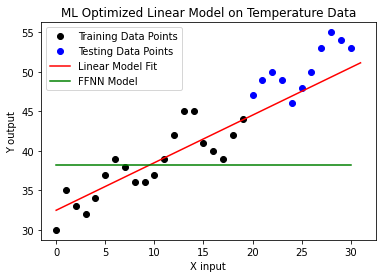

In [144]:
plt.plot(np.arange(0, 20), training_data, 'ko', label = 'Training Data Points')
plt.plot(X[20:], testing_data, 'bo', label = 'Testing Data Points')
plt.plot(x, yfit, 'r-', label = 'Linear Model Fit')
plt.plot(X,new_outputs_pred, 'g', label = 'FFNN Model')
plt.xlabel('X input')
plt.ylabel('Y output')
plt.title('ML Optimized Linear Model on Temperature Data')
plt.legend()
plt.show()

In [106]:
# fitting a line to compare to part iii (First 10 and last 10 are training)
# this code copied from homework 1
training2_data = np.concatenate((Y[0:10], Y[20:31]))
testing2_data = Y[10:20]

Xchange = np.concatenate((X[0:10], X[20:31]))
training_data = Y[:20]
testing_data = Y[20:]

def linefit(c, x, y):
    n = len(y)
    error = np.sqrt((1/n) * np.sum((c[0]*x + c[1]-y)**2))
    return error

#intialize parameters
lineparams0 = np.array([1,30])

res= opt.minimize(linefit, lineparams0, args=(Xchange, training2_data), method='Nelder-Mead')

lineparams = res.x
print('Training Error = ' ,linefit(lineparams,Xchange,training2_data))

x = np.arange(0, 31.01, 0.01)
yfit = (lineparams[0]*x + lineparams[1])

# print parameters m (slope) and b (y intercept)
print('m = ', lineparams[0])
print('b = ', lineparams[1])

# now to test model on the test data. 
print('Test Error = ' ,linefit(lineparams,X[10:20],testing2_data))


Training Error =  1.8093693862954388
m =  0.744322058157542
b =  31.705585215976996
Test Error =  2.948759116314769


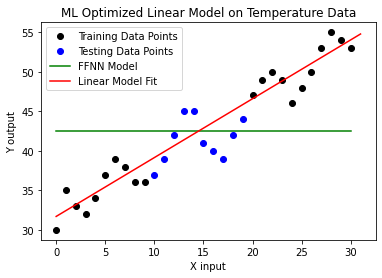

In [138]:
# plot FFNN model compared to homework 1 linear model
plt.plot(Xchange, training2_data, 'ko', label = 'Training Data Points')
plt.plot(X[10:20], testing2_data, 'bo', label = 'Testing Data Points')
plt.plot(X,new_outputs_pred2, 'g', label = 'FFNN Model')
plt.plot(x, yfit, 'r-', label = 'Linear Model Fit')
plt.xlabel('X input')
plt.ylabel('Y output')
plt.title('ML Optimized Linear Model on Temperature Data')
plt.legend()
plt.show()

### Part II

Now train a feedforward neural network on the MNIST data set. You will start by
performing the following analysis:

(i) Compute the first 20 PCA modes of the digit images.

(ii) Build a feed-forward neural network to classify the digits. Compare the results of
the neural network against LSTM, SVM (support vector machines) and decision tree
classifiers.

In [4]:
# import sklearn packages to observe other models
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import pandas

In [5]:
mnist = fetch_openml('mnist_784')
X = mnist.data / 255.0  # Scale the data to [0, 1]
Xnp = pandas.DataFrame.to_numpy(X)
print(np.shape(Xnp))

(70000, 784)


(70000, 20)


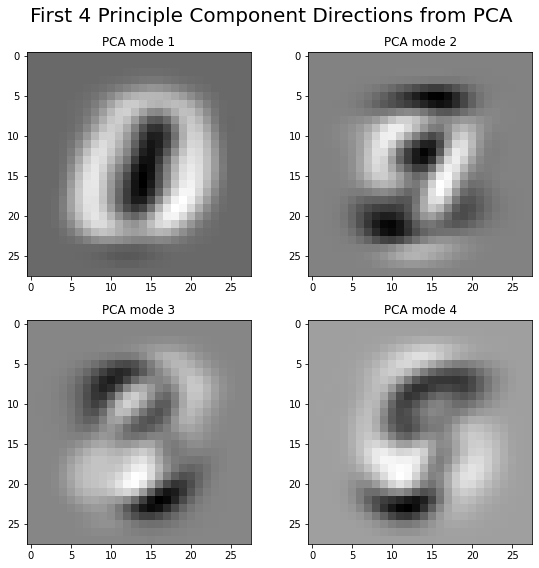

In [35]:
# Apply PCA to reduce the dimensionality of the data
# Creating 20 PCA Components but plotting 4 of them 
pca = PCA(n_components=20)
X_pca = pca.fit_transform(Xnp)
print(np.shape(X_pca))
# Plot the first 4 principal components
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
fig.suptitle('First 4 Principle Component Directions from PCA', fontsize = 20)
axs = axs.ravel()

for i in range(4):
    axs[i].imshow(pca.components_[i].reshape(28, 28), cmap='gray')
    axs[i].set_title(f'PCA mode {i+1}')

plt.tight_layout()
plt.show()

y = np.array(mnist.target, dtype=int)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2)

In [49]:
# First create a feed-forward neural network on these digits

# Define the neural network architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(20, 50)
        self.fc2 = nn.Linear(50, 50)
        self.fc3 = nn.Linear(50, 10)

    def forward(self, x):
        #x = x.view(-1, 784) # flatten the input image
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Load the MNIST dataset and apply transformations
#train_dataset = datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
#test_dataset = datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

#Loading Dataset from PCA components 
train_dataset = torch.tensor(X_train, dtype=torch.float32)
test_dataset = torch.tensor(X_test, dtype=torch.float32)

y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

# Create data loaders
#train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
#test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)


# Initialize the network and define the loss function and optimizer
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.1)

# Train the network
num_epochs = 350
loss_graph = np.zeros(int(num_epochs))
for epoch in range(num_epochs):
    #for i, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = net(train_dataset)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        
        #if (i+1) % 100 == 0:
            #print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, i+1, len(train_loader), loss.item()))
        loss_graph[epoch] = loss.item()
        #if (epoch) % 10 == 0:           
            #print ('Epoch: ', epoch, 'loss:', loss.item())
                   
# Test the network
with torch.no_grad():
    correct = 0
    total = 0
    #for images, labels in test_loader:
    outputs = net(test_dataset)
    _, predicted = torch.max(outputs.data, 1)
    total += y_test.size(0)
    correct += (predicted == y_test).sum().item()
        
    print('Accuracy of the network on the 14000 test images: {} %'.format(100 * correct / total))
    

C:\Users\elija\AppData\Local\Temp\ipykernel_8664\652791724.py:26: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.long)
C:\Users\elija\AppData\Local\Temp\ipykernel_8664\652791724.py:27: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test = torch.tensor(y_test, dtype=torch.long)


Accuracy of the network on the 14000 test images: 88.99285714285715 %


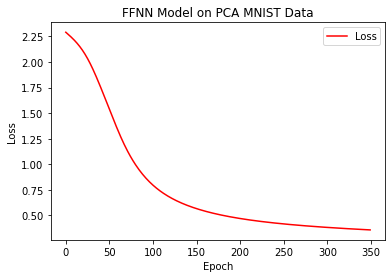

In [50]:
# now to plot Loss over Epochs 
eps = np.arange(num_epochs)
plt.plot(eps, loss_graph, 'r', label = 'Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('FFNN Model on PCA MNIST Data')
plt.legend()
plt.show()

In [36]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms

# define hyperparameters
input_size = 28
hidden_size = 128
num_layers = 2
num_classes = 10
batch_size = 100
learning_rate = 0.001
num_epochs = 5

# load MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

# create data loaders
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# define LSTM network
class LSTMNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTMNet, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        # initialize hidden state and cell state
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)

        # forward pass through LSTM layer
        out, _ = self.lstm(x, (h0, c0))

        # reshape output from LSTM layer
        out = out[:, -1, :]

        # pass output through fully connected layer
        out = self.fc(out)
        return out

# create LSTM network and send to device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
net = LSTMNet(input_size, hidden_size, num_layers, num_classes).to(device)

# define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=learning_rate)

# train LSTM network
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, (images, labels) in enumerate(train_loader):
        # send data to device
        images = images.view(-1, 28, 28).to(device)
        labels = labels.to(device)

        # zero out gradients and perform forward pass
        optimizer.zero_grad()
        outputs = net(images)

        # calculate loss and perform backward pass
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # print average loss for epoch
    avg_loss = running_loss / len(train_loader)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss}")

# evaluate LSTM network on test set
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        # send data to device
        images = images.view(-1, 28, 28).to(device)
        labels = labels.to(device)

        # perform forward pass and get predicted labels
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # print accuracy on test set
    print(f"Test Accuracy: {100 * correct / total}")


100%|██████████████████████████████████████████████████████████████████| 9912422/9912422 [00:00<00:00, 20180454.22it/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw



100%|███████████████████████████████████████████████████████████████████████| 28881/28881 [00:00<00:00, 6577741.85it/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw



100%|██████████████████████████████████████████████████████████████████| 1648877/1648877 [00:00<00:00, 22179683.26it/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw



100%|██████████████████████████████████████████████████████████████████████████████████████| 4542/4542 [00:00<?, ?it/s]

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



Epoch 1/5, Loss: 0.4903703044851621
Epoch 2/5, Loss: 0.1207609460502863
Epoch 3/5, Loss: 0.07986999263288454
Epoch 4/5, Loss: 0.05918200984286765
Epoch 5/5, Loss: 0.04897432131653962
Test Accuracy: 98.3


In [154]:
y = np.array(mnist.target, dtype=int)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2)

# Create a Support Vector Machine (SVM) classifier
clf = SVC()

# Train the classifier on the training set
clf.fit(X_train, y_train)

# Predict the labels of the test set and test set to compare
y_pred = clf.predict(X_test)
y_predtr = clf.predict(X_train)

# Calculate the accuracy of the classifier on the test set and training set to compare
accuracy = accuracy_score(y_test, y_pred)
traccuracy = accuracy_score(y_train, y_predtr)

print(f"Accuracy of SVM on MNIST: {accuracy}")
print(f"Training Accuracy of SVM on MNIST: {traccuracy}")

Accuracy of SVM on MNIST: 0.9740714285714286
Training Accuracy of SVM on MNIST: 0.9825178571428571


In [155]:
# Create a decision tree classifier and fit it to the training data
treeclf = DecisionTreeClassifier(random_state=42)
treeclf.fit(X_train, y_train)

# Predict the labels of the test data and training set to compare
y_pred = treeclf.predict(X_test)
y_predtr = treeclf.predict(X_train)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
traccuracy = accuracy_score(y_train, y_predtr)
print(f"Accuracy of Decision Tree on MNIST: {accuracy:.2f}")
print(f"Training Accuracy of Decision Tree on MNIST: {traccuracy:.2f}")

Accuracy of Decision Tree on MNIST: 0.85
Training Accuracy of Decision Tree on MNIST: 1.00
